As a starting point, we have to read in all dataframes that have the word 'acquisition' and merge them into one dataframe.  Each of these CSV files contains info about a different bank.

In [1]:
import pandas as pd
import glob

acquisition_files = glob.glob("*acquisitions.csv")

acquisitions_df = [pd.read_csv(filename) for filename in acquisition_files]
acquisitions_df = pd.concat(acquisitions_df, axis=0, ignore_index=True)
acquisitions_df

,loan_id,orig_channel,seller_name,orig_int_rate,original_upb,original_loan_term,orig_date,first_pymt_date,orig_ltv,orig_cltv,...,number_units,occ_type,prop_state,zip_code,primary_insurance_pct,product_type,coborrower_credit_score,mortgage_insurance_type,relo_mortgage_indicator,current_delq_status
0,1.001134e+11,B,"FLAGSTAR BANK, FSB",6.375,73000.0,360.0,01/2005,03/2005,80.0,80.0,...,1.0,P,MI,492.0,NaN,FRM,NaN,NaN,N,1.0
1,1.001134e+11,B,"FLAGSTAR BANK, FSB",5.750,70000.0,360.0,02/2005,04/2005,72.0,72.0,...,1.0,P,MO,656.0,NaN,FRM,761.0,NaN,N,1.0
2,1.001673e+11,C,"FLAGSTAR BANK, FSB",6.125,180000.0,240.0,01/2005,03/2005,58.0,58.0,...,1.0,P,CA,934.0,NaN,FRM,NaN,NaN,N,1.0
3,1.002136e+11,B,"FLAGSTAR BANK, FSB",5.375,122000.0,180.0,12/2004,02/2005,85.0,85.0,...,1.0,P,MI,481.0,6.0,FRM,675.0,1.0,N,1.0
4,1.002599e+11,C,"FLAGSTAR BANK, FSB",5.375,206000.0,180.0,02/2005,04/2005,53.0,53.0,...,3.0,P,CA,900.0,NaN,FRM,NaN,NaN,N,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231492,9.998117e+11,C,"CITIMORTGAGE, INC.",4.875,70000.0,180.0,01/2005,03/2005,25.0,25.0,...,1.0,P,PA,156.0,NaN,FRM,789.0,NaN,N,1.0
231493,9.998226e+11,C,"CITIMORTGAGE, INC.",6.000,75000.0,360.0,12/2004,02/2005,75.0,75.0,...,1.0,P,WV,249.0,NaN,FRM,NaN,NaN,N,1.0
231494,9.998283e+11,C,"CITIMORTGAGE, INC.",5.500,204000.0,360.0,01/2005,03/2005,65.0,65.0,...,1.0,P,NJ,88.0,NaN,FRM,786.0,NaN,N,1.0
231495,9.998401e+11,R,"CITIMORTGAGE, INC.",5.875,315000.0,360.0,12/2004,02/2005,62.0,62.0,...,1.0,P,CA,956.0,NaN,FRM,NaN,NaN,N,1.0


Next, we'll read in the data for foreclosed loans and merge them with acquisitions.  The merge will have to be a left join, since not all acquisitions were foreclosed.

In [2]:
foreclosed_df = pd.read_csv("foreclosed_loans.csv")
all_loans = acquisitions_df.merge(foreclosed_df, how="left")

all_loans

,loan_id,orig_channel,seller_name,orig_int_rate,original_upb,original_loan_term,orig_date,first_pymt_date,orig_ltv,orig_cltv,...,prop_state,zip_code,primary_insurance_pct,product_type,coborrower_credit_score,mortgage_insurance_type,relo_mortgage_indicator,current_delq_status,foreclosure_date,foreclosure_flag
0,1.001134e+11,B,"FLAGSTAR BANK, FSB",6.375,73000.0,360.0,01/2005,03/2005,80.0,80.0,...,MI,492.0,NaN,FRM,NaN,NaN,N,1.0,NaN,NaN
1,1.001134e+11,B,"FLAGSTAR BANK, FSB",5.750,70000.0,360.0,02/2005,04/2005,72.0,72.0,...,MO,656.0,NaN,FRM,761.0,NaN,N,1.0,NaN,NaN
2,1.001673e+11,C,"FLAGSTAR BANK, FSB",6.125,180000.0,240.0,01/2005,03/2005,58.0,58.0,...,CA,934.0,NaN,FRM,NaN,NaN,N,1.0,NaN,NaN
3,1.002136e+11,B,"FLAGSTAR BANK, FSB",5.375,122000.0,180.0,12/2004,02/2005,85.0,85.0,...,MI,481.0,6.0,FRM,675.0,1.0,N,1.0,NaN,NaN
4,1.002599e+11,C,"FLAGSTAR BANK, FSB",5.375,206000.0,180.0,02/2005,04/2005,53.0,53.0,...,CA,900.0,NaN,FRM,NaN,NaN,N,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231492,9.998117e+11,C,"CITIMORTGAGE, INC.",4.875,70000.0,180.0,01/2005,03/2005,25.0,25.0,...,PA,156.0,NaN,FRM,789.0,NaN,N,1.0,NaN,NaN
231493,9.998226e+11,C,"CITIMORTGAGE, INC.",6.000,75000.0,360.0,12/2004,02/2005,75.0,75.0,...,WV,249.0,NaN,FRM,NaN,NaN,N,1.0,NaN,NaN
231494,9.998283e+11,C,"CITIMORTGAGE, INC.",5.500,204000.0,360.0,01/2005,03/2005,65.0,65.0,...,NJ,88.0,NaN,FRM,786.0,NaN,N,1.0,NaN,NaN
231495,9.998401e+11,R,"CITIMORTGAGE, INC.",5.875,315000.0,360.0,12/2004,02/2005,62.0,62.0,...,CA,956.0,NaN,FRM,NaN,NaN,N,1.0,NaN,NaN


The **foreclosure_flag** column has a value of '1' when a loan was foreclosed.  It will make things easier later if all NaN values (i.e., loans that were not foreclosed) had a value of '0' instead.

In [3]:
all_loans.foreclosure_flag.loc[all_loans.foreclosure_flag.isnull()] = 0

/usr/local/Cellar/jupyterlab/2.1.2/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
all_loans.foreclosure_flag.unique()

array([0., 1.])

# What factors contribute to likelihood of foreclosure?

What we want to explore is which factors contribute the most to foreclosure.  We want to know what patterns exist that increase the likelihood that a loan will be foreclosed.  In other words, we want to hone in on the most important **predictor variables**.

As a starting point, let's look at 3 factors that banks usually look at to determine whether a borrower is credit worthy:

### 1. Credit score
From Investopedia:

> A credit score is a number ranging from 300-850 that depicts a consumer's creditworthiness. The higher the credit score, the more attractive the borrower.


### 2. Loan-to-value ratio (LTV)
This represents the total \\$ value of the mortgage divided by the \\$ appraised value of the house. For example, if you buy a house for $100,000 and put \\$20k down, you will need a mortgage of \\$80k. The LTV of this purchase would be 80\% (80k/100k).

If the LTV is higher, that means that you have less equity in the house. Higher LTVs are
traditionally considered to be riskier.


### 3. Debt-to-Income ratio (DTI)
DTI stands for Debt to Income. This represents total debt payments the borrower needs to
make in a month divided by their monthly gross income (including the mortgage payment
itself).

For Example – If you have a \\$500 Car Payment and a \\$2000 Mortgage and gross income of
\\$5000 a month, your DTI would be 50% (\\$2500 ÷ \\$5000). Typically, a higher DTI is riskier.

Let's take a look at some summary stats comparing the difference between these foreclose loans and non-foreclosed loans.

Then, let's create some plots to get a visual feel for the data.

In [5]:
# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

all_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231497 entries, 0 to 231496
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_id                  231497 non-null  float64
 1   orig_channel             231497 non-null  object 
 2   seller_name              231497 non-null  object 
 3   orig_int_rate            231497 non-null  float64
 4   original_upb             231497 non-null  float64
 5   original_loan_term       231497 non-null  float64
 6   orig_date                231497 non-null  object 
 7   first_pymt_date          231497 non-null  object 
 8   orig_ltv                 231497 non-null  float64
 9   orig_cltv                231481 non-null  float64
 10  num_borrowers            231496 non-null  float64
 11  orig_dti                 211948 non-null  float64
 12  credit_score             229423 non-null  float64
 13  first_time_buyer         231497 non-null  object 
 14  loan

In [6]:
# summarize all loans
all_loans.describe()

,loan_id,orig_int_rate,original_upb,original_loan_term,orig_ltv,orig_cltv,num_borrowers,orig_dti,credit_score,number_units,zip_code,primary_insurance_pct,coborrower_credit_score,mortgage_insurance_type,current_delq_status,foreclosure_flag
count,231497.00,231497.00,231497.00,231497.00,231497.00,231481.00,231496.00,211948.00,229423.00,231497.00,231497.00,29364.00,103196.00,29364.00,231497.00,231497.00
mean,548973076686.20,5.68,166677.57,313.79,68.31,70.03,1.58,36.23,721.34,1.04,517.92,22.88,729.19,1.05,1.00,0.04
std,259775197712.91,0.36,83467.86,77.77,17.21,17.97,0.51,13.18,57.99,0.24,309.48,7.24,57.06,0.22,0.00,0.20
min,100000102115.00,4.00,9000.00,84.00,1.00,1.00,1.00,1.00,384.00,1.00,8.00,6.00,391.00,1.00,1.00,0.00
25%,324226648577.00,5.50,100000.00,240.00,58.00,60.00,1.00,26.00,679.00,1.00,272.00,17.00,688.00,1.00,1.00,0.00
50%,548746176407.00,5.75,150000.00,360.00,73.00,74.00,2.00,36.00,727.00,1.00,486.00,25.00,738.00,1.00,1.00,0.00
75%,774045838484.00,5.88,220000.00,360.00,80.00,80.00,2.00,46.00,771.00,1.00,837.00,30.00,777.00,1.00,1.00,0.00
max,999996197450.00,9.00,692000.00,360.00,97.00,193.00,5.00,64.00,850.00,4.00,999.00,39.00,842.00,2.00,1.00,1.00


In [7]:
# summarize non-foreclosed loans
good_loans_stats = all_loans[all_loans.foreclosure_flag==0].describe()

# drop useless columns
good_loans_stats = good_loans_stats.drop(['loan_id',
                                          'zip_code',
                                          'foreclosure_flag'], 
                                         axis=1)

good_loans_stats

,orig_int_rate,original_upb,original_loan_term,orig_ltv,orig_cltv,num_borrowers,orig_dti,credit_score,number_units,primary_insurance_pct,coborrower_credit_score,mortgage_insurance_type,current_delq_status
count,221964.00,221964.00,221964.00,221964.00,221948.00,221963.00,203301.00,219979.00,221964.00,26679.00,99938.00,26679.00,221964.00
mean,5.67,167069.08,312.56,67.90,69.63,1.58,36.09,722.68,1.04,22.75,730.34,1.05,1.00
std,0.36,83588.46,78.50,17.29,18.06,0.51,13.21,57.78,0.24,7.27,56.84,0.21,0.00
min,4.00,9000.00,84.00,1.00,1.00,1.00,1.00,384.00,1.00,6.00,391.00,1.00,1.00
25%,5.50,100000.00,240.00,58.00,59.00,1.00,26.00,680.00,1.00,17.00,690.00,1.00,1.00
50%,5.75,150000.00,360.00,73.00,74.00,2.00,36.00,729.00,1.00,25.00,740.00,1.00,1.00
75%,5.88,220000.00,360.00,80.00,80.00,2.00,46.00,772.00,1.00,30.00,778.00,1.00,1.00
max,9.00,692000.00,360.00,97.00,193.00,5.00,64.00,850.00,4.00,39.00,839.00,2.00,1.00


In [8]:
# summarize foreclosed loans only
bad_loans_stats = all_loans[all_loans.foreclosure_flag==1].describe()

# drop useless columns
bad_loans_stats = bad_loans_stats.drop(['loan_id',
                                          'zip_code',
                                          'foreclosure_flag'], 
                                         axis=1)

bad_loans_stats

,orig_int_rate,original_upb,original_loan_term,orig_ltv,orig_cltv,num_borrowers,orig_dti,credit_score,number_units,primary_insurance_pct,coborrower_credit_score,mortgage_insurance_type,current_delq_status
count,9533.00,9533.00,9533.00,9533.00,9533.00,9533.00,8647.00,9444.00,9533.00,2685.00,3258.00,2685.00,9533.00
mean,5.85,157561.73,342.47,77.89,79.31,1.43,39.49,690.08,1.04,24.19,694.10,1.07,1.00
std,0.34,80073.76,50.32,11.79,12.38,0.51,11.89,53.91,0.25,6.72,52.75,0.25,0.00
min,4.50,13000.00,120.00,14.00,14.00,1.00,2.00,442.00,1.00,6.00,457.00,1.00,1.00
25%,5.62,95000.00,360.00,71.00,72.00,1.00,31.00,653.00,1.00,25.00,659.00,1.00,1.00
50%,5.88,144000.00,360.00,80.00,80.00,1.00,40.00,686.00,1.00,25.00,692.00,1.00,1.00
75%,6.00,208000.00,360.00,85.00,90.00,2.00,48.00,728.00,1.00,30.00,731.00,1.00,1.00
max,8.00,478000.00,360.00,97.00,145.00,4.00,64.00,844.00,4.00,35.00,842.00,2.00,1.00


Let's take a look at 

In [9]:
# compare difference between dataframes
compare_stats = bad_loans_stats.div(good_loans_stats).sub(1).mul(100)
compare_stats

,orig_int_rate,original_upb,original_loan_term,orig_ltv,orig_cltv,num_borrowers,orig_dti,credit_score,number_units,primary_insurance_pct,coborrower_credit_score,mortgage_insurance_type,current_delq_status
count,-95.71,-95.71,-95.71,-95.71,-95.70,-95.71,-95.75,-95.71,-95.71,-89.94,-96.74,-89.94,-95.71
mean,3.14,-5.69,9.57,14.71,13.90,-9.60,9.43,-4.51,0.46,6.32,-4.96,1.83,0.00
std,-5.28,-4.20,-35.90,-31.82,-31.47,0.37,-9.98,-6.69,4.33,-7.59,-7.19,17.17,nan
min,12.50,44.44,42.86,1300.00,1300.00,0.00,100.00,15.10,0.00,0.00,16.88,0.00,0.00
25%,2.27,-5.00,50.00,22.41,22.03,0.00,19.23,-3.97,0.00,47.06,-4.49,0.00,0.00
50%,2.17,-4.00,0.00,9.59,8.11,-50.00,11.11,-5.90,0.00,0.00,-6.49,0.00,0.00
75%,2.13,-5.45,0.00,6.25,12.50,0.00,4.35,-5.70,0.00,0.00,-6.04,0.00,0.00
max,-11.11,-30.92,0.00,0.00,-24.87,-20.00,0.00,-0.71,0.00,-10.26,0.36,0.00,0.00


Now let's plot them.  Let's add the magic function *%matplotlib inline* to make sure that the images are stored in this notebook.

In [10]:
%matplotlib inline

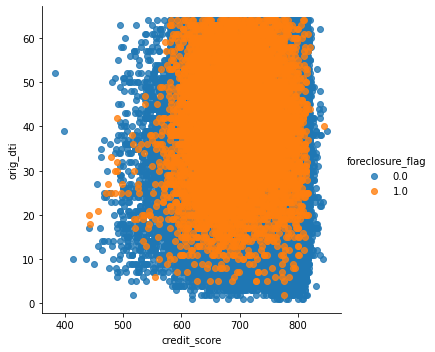

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

credit_plot = sns.lmplot("credit_score", 
                         "orig_dti",
                         hue="foreclosure_flag",
                         data=all_loans,
                         fit_reg=False)
plt.show()

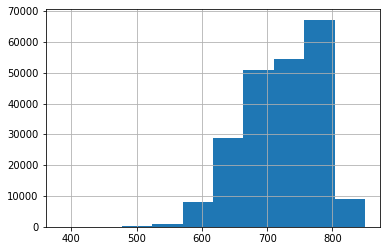

In [12]:
# histogram of credit score for non-foreclosed loans
all_loans[all_loans.foreclosure_flag == 0].loc[:, 'credit_score'].hist()

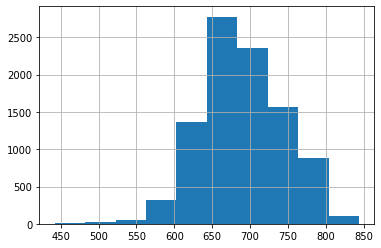

In [13]:
# histogram of credit score for foreclosed loans
all_loans[all_loans.foreclosure_flag == 1].loc[:, 'credit_score'].hist()

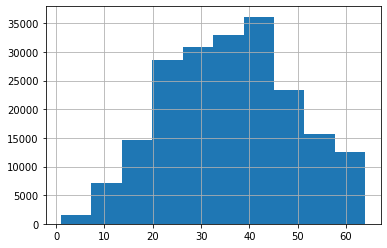

In [14]:
# histogram of DTI for non-foreclosed loans
all_loans[all_loans.foreclosure_flag == 0].loc[:, 'orig_dti'].hist()

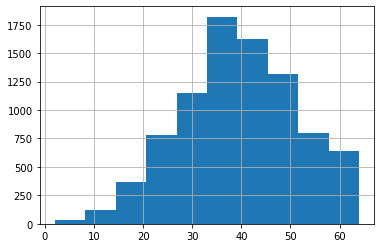

In [15]:
# histogram of DTI for foreclosed loans
all_loans[all_loans.foreclosure_flag == 1].loc[:, 'orig_dti'].hist()

Let's take a look at how foreclosure factors vary across companies.

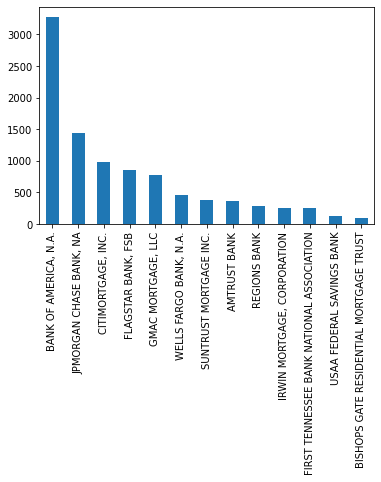

In [22]:
# frequency count of sellers with most foreclosed loans
all_loans[all_loans.foreclosure_flag == 1]['seller_name'].value_counts().plot.bar()

In [25]:
# foreclosed loans aggregates
all_loans_aggs = pd.value_counts(all_loans['seller_name']).reset_index()
all_loans_aggs.columns = ['seller_name', 'total_loans']


# foreclosed loans aggregates
foreclosed_aggs = pd.value_counts(all_loans[all_loans.foreclosure_flag == 1]['seller_name']).reset_index()
foreclosed_aggs.columns = ['seller_name', 'total_foreclosed']

# compile results
all_loans_aggs = foreclosed_aggs.merge(all_loans_aggs)
all_loans_aggs['pct_foreclosed'] = all_loans_aggs['total_foreclosed']/all_loans_aggs['total_loans']
all_loans_aggs.sort_values(by=['pct_foreclosed'], ascending=False)

,seller_name,total_foreclosed,total_loans,pct_foreclosed
3,"FLAGSTAR BANK, FSB",853,13447,0.06
0,"BANK OF AMERICA, N.A.",3275,57150,0.06
7,AMTRUST BANK,362,8056,0.04
8,REGIONS BANK,292,6878,0.04
9,"IRWIN MORTGAGE, CORPORATION",249,6514,0.04
4,"GMAC MORTGAGE, LLC",773,21653,0.04
12,BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,90,2625,0.03
2,"CITIMORTGAGE, INC.",987,29040,0.03
1,"JPMORGAN CHASE BANK, NA",1435,42363,0.03
10,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,247,7503,0.03


In [26]:
# add columns for mean credit scores
all_loans_aggs = all_loans_aggs.merge(all_loans.groupby(['seller_name'])[['credit_score']].mean().reset_index())
all_loans_aggs = all_loans_aggs.rename(columns={'credit_score': 'mean_credit_all'})
all_loans_aggs = all_loans_aggs.merge(all_loans[all_loans.foreclosure_flag == 1].groupby(['seller_name'])[['credit_score']].mean().reset_index())
all_loans_aggs = all_loans_aggs.rename(columns={'credit_score': 'mean_credit_foreclosed'})


# add columns for median credit scores
all_loans_aggs = all_loans_aggs.merge(all_loans.groupby(['seller_name'])[['credit_score']].median().reset_index())
all_loans_aggs = all_loans_aggs.rename(columns={'credit_score': 'median_credit_all'})
all_loans_aggs = all_loans_aggs.merge(all_loans[all_loans.foreclosure_flag == 1].groupby(['seller_name'])[['credit_score']].median().reset_index())
all_loans_aggs = all_loans_aggs.rename(columns={'credit_score': 'median_credit_foreclosed'})


all_loans_aggs.sort_values(by='median_credit_foreclosed')

,seller_name,total_foreclosed,total_loans,pct_foreclosed,mean_credit_all,mean_credit_foreclosed,median_credit_all,median_credit_foreclosed
0,"BANK OF AMERICA, N.A.",3275,57150,0.06,710.84,684.41,710.00,678.00
9,"IRWIN MORTGAGE, CORPORATION",249,6514,0.04,722.66,682.88,729.00,678.00
1,"JPMORGAN CHASE BANK, NA",1435,42363,0.03,723.38,684.27,732.00,681.00
2,"CITIMORTGAGE, INC.",987,29040,0.03,715.86,683.15,720.00,682.00
6,SUNTRUST MORTGAGE INC.,379,13185,0.03,728.37,692.82,739.00,690.00
3,"FLAGSTAR BANK, FSB",853,13447,0.06,714.35,696.71,718.00,692.00
10,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,247,7503,0.03,724.25,695.49,732.00,693.00
8,REGIONS BANK,292,6878,0.04,721.07,692.38,725.00,694.00
12,BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,90,2625,0.03,728.78,692.84,738.00,695.50
7,AMTRUST BANK,362,8056,0.04,727.92,698.25,738.00,696.00
